In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [61]:
# Load the cleaned dataset
df = pd.read_csv('CVD_cleaned.csv')

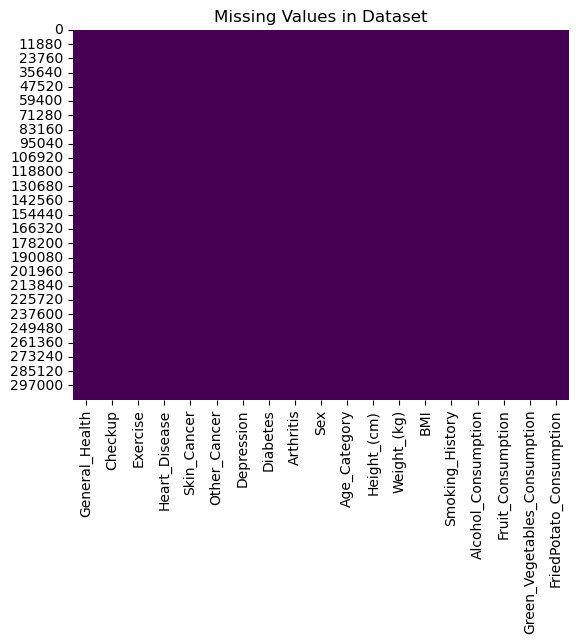

In [62]:
# Check for missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()


In [63]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


In [64]:
# Standardizing numerical columns
scaler = StandardScaler()
numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                     'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])


In [65]:
# Define the target variable (Heart Disease) and features
X = df_encoded.drop(['Heart_Disease_Yes'], axis=1) 
y = df_encoded['Heart_Disease_Yes']


In [66]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Instantiate the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

       False       0.92      1.00      0.96     56774
        True       0.45      0.04      0.08      4997

    accuracy                           0.92     61771
   macro avg       0.69      0.52      0.52     61771
weighted avg       0.88      0.92      0.89     61771



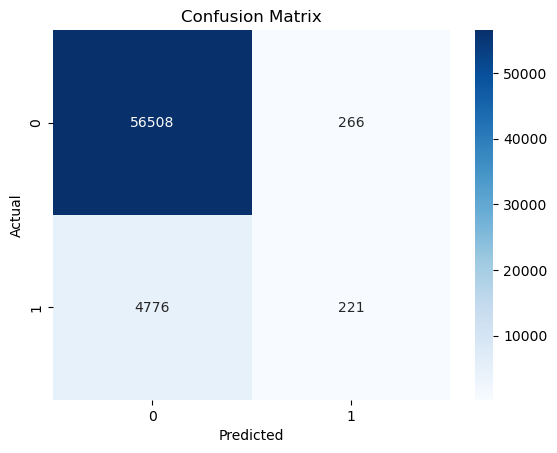

In [68]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


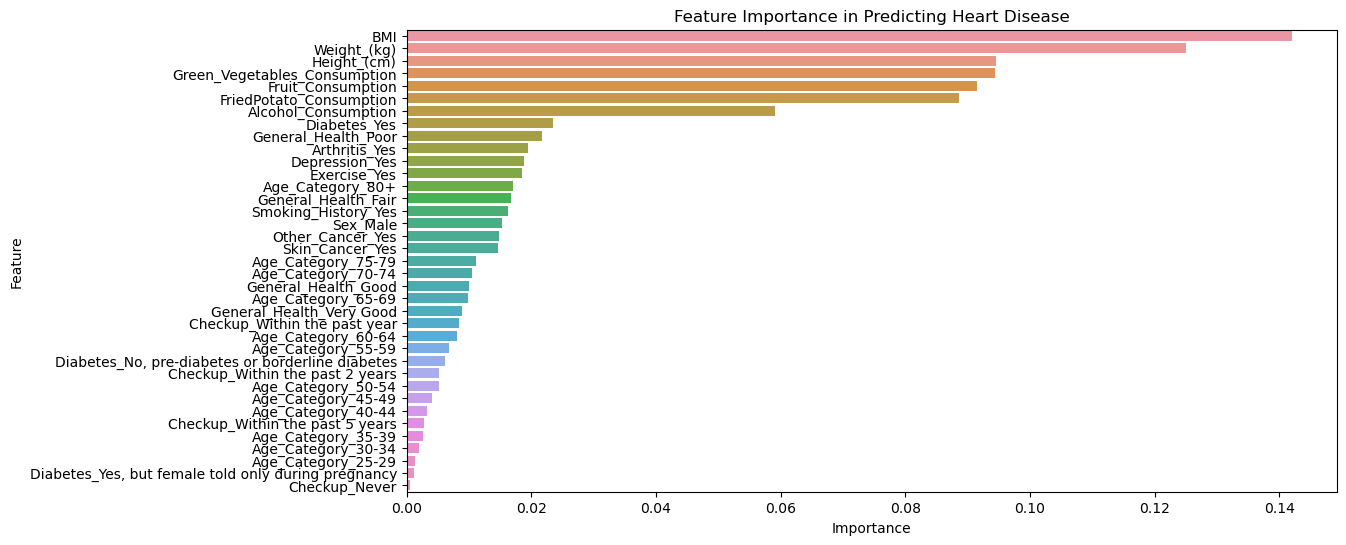

In [69]:
# Check feature importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance in Predicting Heart Disease')
plt.show()


In [88]:
# Create a new patient record
new_patient = pd.DataFrame({
    'Height_(cm)': [160],
    'Weight_(kg)': [200],
    'BMI': [40],
    'Alcohol_Consumption': [0],
    'Fruit_Consumption': [0],
    'Green_Vegetables_Consumption': [10],
    'FriedPotato_Consumption': [15],
    'General_Health_Fair': [0],
    'General_Health_Good': [0],
    'General_Health_Poor': [0],
    'General_Health_Very Good': [0],
    'Checkup_Never': [1],
    'Checkup_Within the past 2 years': [0],
    'Checkup_Within the past 5 years': [1],
    'Checkup_Within the past year': [0],
    'Exercise_Yes': [1],
    'Skin_Cancer_Yes': [1],
    'Other_Cancer_Yes': [1],
    'Depression_Yes': [1],
    'Diabetes_No, pre-diabetes or borderline diabetes': [0],
    'Diabetes_Yes': [1],
    'Diabetes_Yes, but female told only during pregnancy': [0],
    'Arthritis_Yes': [1],
    'Sex_Male': [0],  
    'Age_Category_25-29': [0],
    'Age_Category_30-34': [0],
    'Age_Category_35-39': [0],
    'Age_Category_40-44': [0],
    'Age_Category_45-49': [0],
    'Age_Category_50-54': [0],
    'Age_Category_55-59': [0],
    'Age_Category_60-64': [0],
    'Age_Category_65-69': [0],
    'Age_Category_70-74': [0],
    'Age_Category_75-79': [0],
    'Age_Category_80+': [1],
    'Smoking_History_Yes': [1]
})

In [89]:
# Ensure that the new patient DataFrame has all features that the model expects
features = X.columns.tolist()  # Get feature names from training data

if set(features).issubset(new_patient.columns):
    # Standardize the numerical features of the new patient using the same scaler
    new_patient[numerical_columns] = scaler.transform(new_patient[numerical_columns])
    
    # Ensure the new patient DataFrame has the correct columns in the same order as the model expects
    new_patient = new_patient.reindex(columns=features)
    
    # Make a prediction
    prediction = model.predict(new_patient)
    print("Predicted Heart Disease:", "Yes" if prediction[0] == 1 else "No")
else:
    print("The new patient record is missing some features:", set(features) - set(new_patient.columns))

Predicted Heart Disease: No
